# Importing Packages & reading file

In [1]:
#importing pandas and reading file
import pandas as pd
file = "/Users/srijanagella/Documents/AmazonReviews.csv"
df = pd.read_csv(file)
df.head(20)

Id   ProductId          UserId                      ProfileName  \
0    1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1    2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2    3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3    4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4    5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
5    6  B006K2ZZ7K   ADT0SRK1MGOEU                   Twoapennything   
6    7  B006K2ZZ7K  A1SP2KVKFXXRU1                David C. Sullivan   
7    8  B006K2ZZ7K  A3JRGQVEQN31IQ               Pamela G. Williams   
8    9  B000E7L2R4  A1MZYO9TZK0BBI                         R. James   
9   10  B00171APVA  A21BT40VZCCYT4                    Carol A. Reed   
10  11  B0001PB9FE  A3HDKO7OW0QNK4                     Canadian Fan   
11  12  B0009XLVG0  A2725IB4YY9JEB           A Poeng "SparkyGoHome"   
12  13  B0009XLVG0   A327PCT23YH90                               LT   
13  14  B001GVISJM  A18ECVX2RJ7HUE                  willie "roadie"   
14  15  B001GVISJM  A2MUGFV2TDQ47K              Lynrie "Oh HELL no"   
15  16  B001GVISJM  A1CZX3CP8IKQIJ                     Brian A. Lee   
16  17  B001GVISJM  A3KLWF6WQ5BNYO                   Erica Neathery   
17  18  B001GVISJM   AFKW14U97Z6QO                            Becca   
18  19  B001GVISJM  A2A9X58G2GTBLP                          Wolfee1   
19  20  B001GVISJM  A3IV7CL2C13K2U                             Greg   

    HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                      1                       1      5  1303862400   
1                      0                       0      1  1346976000   
2                      1                       1      4  1219017600   
3                      3                       3      2  1307923200   
4                      0                       0      5  1350777600   
5                      0                       0      4  1342051200   
6                      0                       0      5  1340150400   
7                      0                       0      5  1336003200   
8                      1                       1      5  1322006400   
9                      0                       0      5  1351209600   
10                     1                       1      5  1107820800   
11                     4                       4      5  1282867200   
12                     1                       1      1  1339545600   
13                     2                       2      4  1288915200   
14                     4                       5      5  1268352000   
15                     4                       5      5  1262044800   
16                     0                       0      2  1348099200   
17                     0                       0      5  1345075200   
18                     0                       0      5  1324598400   
19                     0                       0      5  1318032000   

                                              Summary  \
0                               Good Quality Dog Food   
1                                   Not as Advertised   
2                               "Delight" says it all   
3                                      Cough Medicine   
4                                         Great taffy   
5                                          Nice Taffy   
6       Great!  Just as good as the expensive brands!   
7                              Wonderful, tasty taffy   
8                                          Yay Barley   
9                                    Healthy Dog Food   
10                    The Best Hot Sauce in the World   
11  My cats LOVE this "diet" food better than thei...   
12               My Cats Are Not Fans of the New Food   
13                                  fresh and greasy!   
14                       Strawberry Twizzlers - Yummy   
15           Lots of twizzlers, just what you expect.   
16                                         poor tas

# Displaying 400 characters of text

In [3]:
#Displaying 400 characters of text from specific rows in the DataFrame using iloc
print(repr(df.iloc[2666]["Summary"][0:400]))
print(repr(df.iloc[4726]["Summary"][0:400]))

'Tea'
'Great alternative'


# TEXT SPLITTING

In [4]:
import re

# Fill NaN values with an empty string
df["Summary"] = df["Summary"].fillna("")

# Apply regular expression
df["paragraphs"] = df["Summary"].map(lambda text: re.split(r'\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

# TF-IDF Transformation of Textual Data Utilizing Scikit-learn

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['Summary'])
tfidf_text_vectors.shape

/Users/srijanagella/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(568454, 11166)

# Flatten the paragraphs

In [7]:
# flatten the paragraphs keeping the overall
paragraph_df = pd.DataFrame([{ "Summary": paragraph, "HelpfulnessNumerator": overall } 
                               for paragraphs, overall in zip(df["paragraphs"], df["HelpfulnessNumerator"]) 
                                    for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

Summary  HelpfulnessNumerator
0                          Good Quality Dog Food                     1
1                              Not as Advertised                     0
2                          "Delight" says it all                     1
3                                 Cough Medicine                     3
4                                    Great taffy                     0
5                                     Nice Taffy                     0
6  Great!  Just as good as the expensive brands!                     0
7                         Wonderful, tasty taffy                     0
8                                     Yay Barley                     1
9                               Healthy Dog Food                     0

# TF-IDF VECTORISATION OF PARAGRAPHS USING SCIKIT-LEARN 

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["Summary"])
tfidf_para_vectors.shape

/Users/srijanagella/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(568427, 11166)

# TOPIC MODELING WITH NMF

In [9]:
# Imports NMF from sklearn.decomposition, initializes an NMF model
from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

# DISPLAYING TOP WORDS

In [10]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
  great (39.10)
  taste (4.77)
  price (3.23)
  snack (2.04)
  flavor (1.94)

Topic 01
  good (45.40)
  stuff (5.31)
  pretty (2.30)
  price (1.89)
  taste (1.85)

Topic 02
  love (53.02)
  dogs (6.55)
  stuff (4.10)
  cats (3.55)
  kids (1.34)

Topic 03
  delicious (63.12)
  healthy (2.13)
  absolutely (1.38)
  snack (1.15)
  nutritious (0.89)

Topic 04
  best (37.47)
  food (1.67)
  ve (1.63)
  dog (1.43)
  chips (1.19)

Topic 05
  yummy (67.28)
  healthy (1.67)
  snack (1.20)
  super (0.84)
  treat (0.74)

Topic 06
  product (59.40)
  awesome (2.81)
  wonderful (2.53)
  price (1.66)
  amazing (1.15)

Topic 07
  coffee (45.36)
  cup (3.73)
  favorite (2.31)
  strong (1.39)
  like (1.24)

Topic 08
  tea (37.82)
  favorite (4.84)
  green (3.52)
  tasty (2.76)
  wonderful (1.77)

Topic 09
  excellent (44.27)
  food (3.71)
  dog (3.52)
  taste (2.94)
  flavor (2.20)


# TOPIC MODELING USING NON-NEGATIVE MATRIX

In [11]:
# Fit the NMF model to TF-IDF vectors of paragraph data
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
  great (39.10)
  taste (4.77)
  price (3.23)
  snack (2.04)
  flavor (1.94)

Topic 01
  good (45.40)
  stuff (5.31)
  pretty (2.30)
  price (1.89)
  taste (1.85)

Topic 02
  love (53.02)
  dogs (6.55)
  stuff (4.10)
  cats (3.55)
  kids (1.34)

Topic 03
  delicious (63.12)
  healthy (2.13)
  absolutely (1.38)
  snack (1.15)
  nutritious (0.89)

Topic 04
  best (37.47)
  food (1.67)
  ve (1.63)
  dog (1.43)
  chips (1.19)

Topic 05
  yummy (67.28)
  healthy (1.67)
  snack (1.20)
  super (0.84)
  treat (0.74)

Topic 06
  product (59.40)
  awesome (2.81)
  wonderful (2.53)
  price (1.66)
  amazing (1.15)

Topic 07
  coffee (45.36)
  cup (3.73)
  favorite (2.31)
  strong (1.39)
  like (1.24)

Topic 08
  tea (37.82)
  favorite (4.84)
  green (3.52)
  tasty (2.76)
  wonderful (1.77)

Topic 09
  excellent (44.27)
  food (3.71)
  dog (3.52)
  taste (2.94)
  flavor (2.20)


# CALCULATING PERCENTAGE

In [12]:
# calculates the percentage distribution of topics across documents
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([15.67269193, 16.14558872, 10.69046386,  8.56258988, 10.83130767,
        6.09523726,  6.82739691,  7.6476611 ,  9.04662779,  8.48043488])

In [13]:
#calculates the percentage distribution of topics across paragraphs.
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([15.67262812, 16.14559339, 10.69046773,  8.56259439, 10.83129602,
        6.09525696,  6.82742799,  7.64767368,  9.04662977,  8.48043196])

# COUNT VECTORIZATION OF PARAGRAPHS

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Reduce the size of the dataset (optional)
paragraph_df_subset = paragraph_df.sample(n=100)  # Adjust the sample size as needed

# Initialize CountVectorizer with English stop words
count_para_vectorizer = CountVectorizer(stop_words='english', min_df=5, max_df=0.7)

# Fit and transform the CountVectorizer on the dataset
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["Summary"])

# Initialize LatentDirichletAllocation with desired parameters
lda_para_model = LatentDirichletAllocation(n_components=10, random_state=42, n_jobs=-1)  # Utilize multiple CPU cores

# Fit the LDA model to the CountVectorizer output
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)

# Get the topic-word distributions
H_lda_para_matrix = lda_para_model.components_

In [15]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Reduce the size of the dataset (optional)
paragraph_df_subset = paragraph_df.sample(n=100)  # Adjust the sample size as needed
stop_words = stopwords.words('english')  # Get English stopwords
count_para_vectorizer = CountVectorizer(stop_words=stop_words, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["Summary"])
count_para_vectors.shape

(568427, 11293)

# TOPIC MODELING FOR PARAGRAPHS USING LDA

In [16]:
#fits the LDA model to the count vectors of paragraph data
from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

# DISPLAYING TOP WORDS LDA MODEL

In [17]:
# Assuming count_para_vectorizer is properly initialized and fitted
feature_names = count_para_vectorizer.get_feature_names_out()

# Then use the feature names with the display_topics function
display_topics(lda_para_model, feature_names)


Topic 00
  taste (11.43)
  great (6.82)
  chocolate (3.69)
  wonderful (3.58)
  hot (2.83)

Topic 01
  dog (9.65)
  loves (5.86)
  yum (4.17)
  food (3.06)
  snack (3.05)

Topic 02
  best (17.80)
  delicious (10.02)
  ever (5.08)
  awesome (3.41)
  like (3.26)

Topic 03
  good (27.00)
  coffee (10.88)
  tea (4.21)
  bad (2.62)
  cup (2.62)

Topic 04
  great (31.74)
  product (8.59)
  tasty (5.67)
  price (5.31)
  coffee (2.19)

Topic 05
  love (17.52)
  excellent (8.41)
  food (5.66)
  stuff (5.27)
  dogs (4.38)

Topic 06
  flavor (9.00)
  nice (3.95)
  way (2.08)
  fresh (1.67)
  tea (1.51)

Topic 07
  favorite (6.07)
  better (4.63)
  perfect (3.62)
  treat (2.09)
  tea (1.77)

Topic 08
  quality (4.07)
  little (3.16)
  easy (2.66)
  happy (1.93)
  baby (1.66)

Topic 09
  yummy (8.78)
  sweet (4.54)
  one (2.88)
  bar (1.94)
  treats (1.80)


# TOPIC DISTRIBUTION

In [18]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 9.58215383,  9.24210928, 11.32377374, 11.45587337, 11.76348348,
       10.30711505,  9.33248194,  9.68130024,  8.85833373,  8.45337533])

# WORDCLOUDS

In [19]:

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

/var/folders/kp/b62l9qwn3hg95vzxz9q38x440000gn/T/ipykernel_1744/3632227722.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


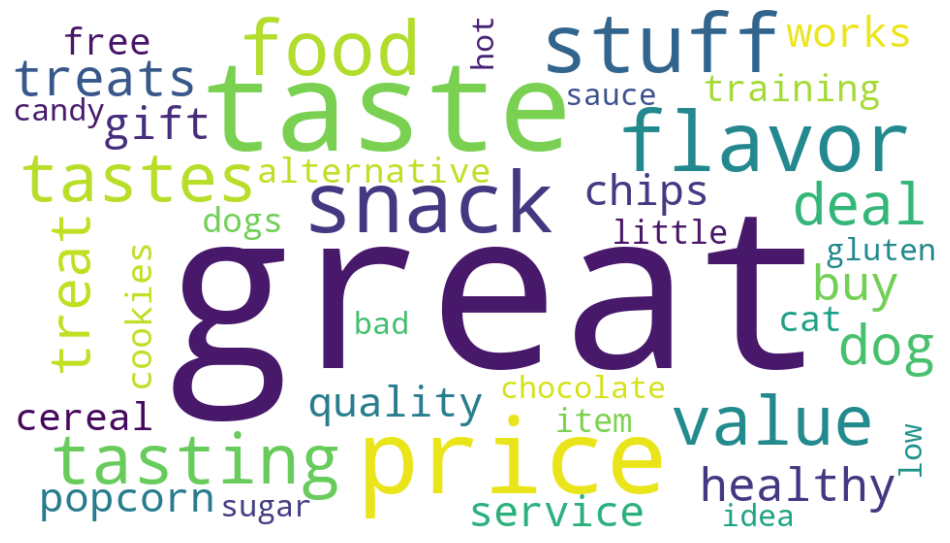

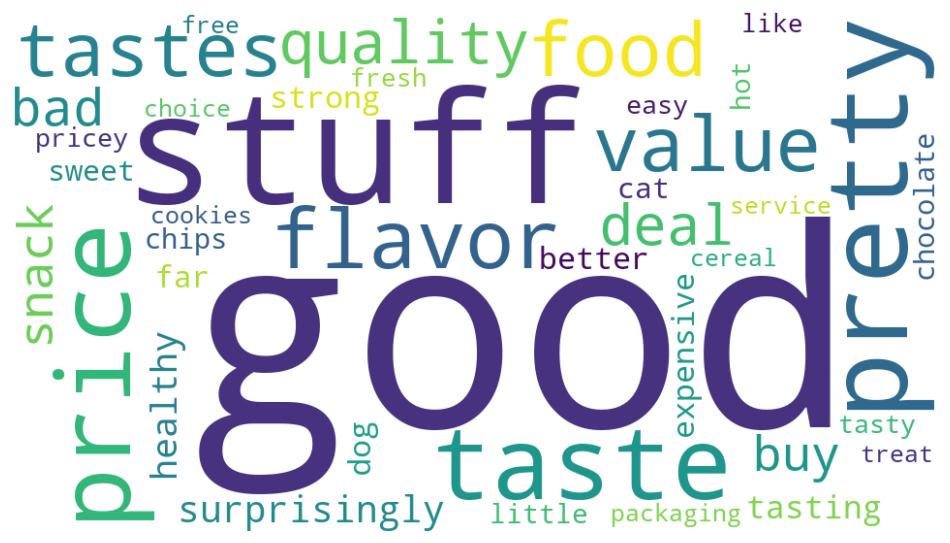

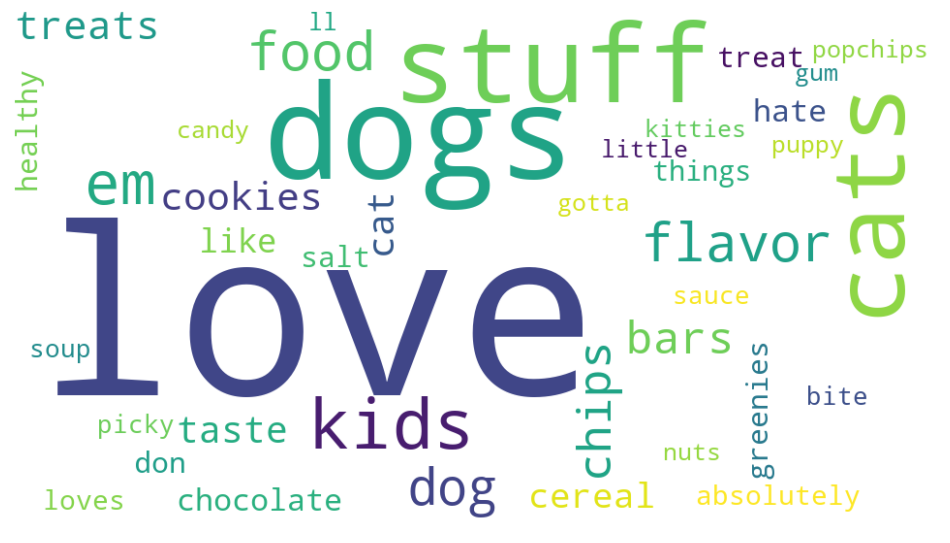

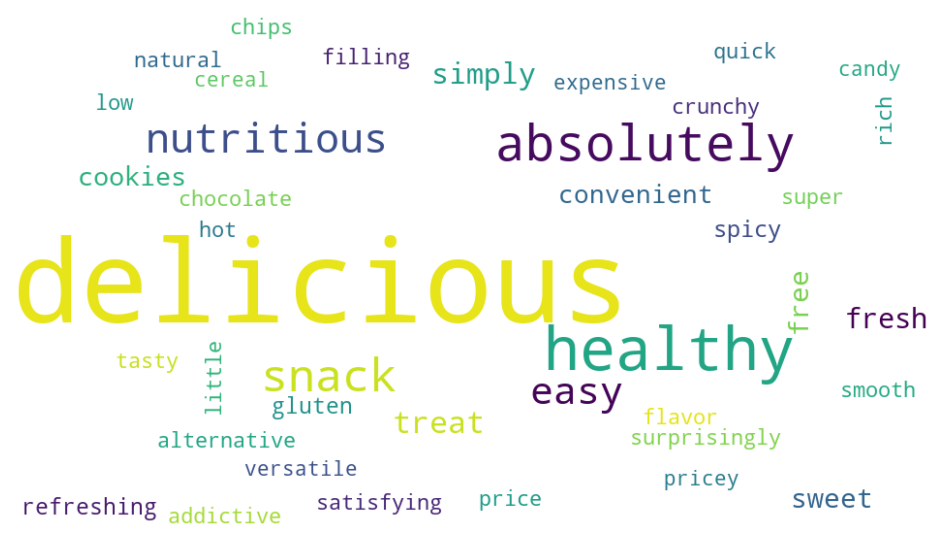

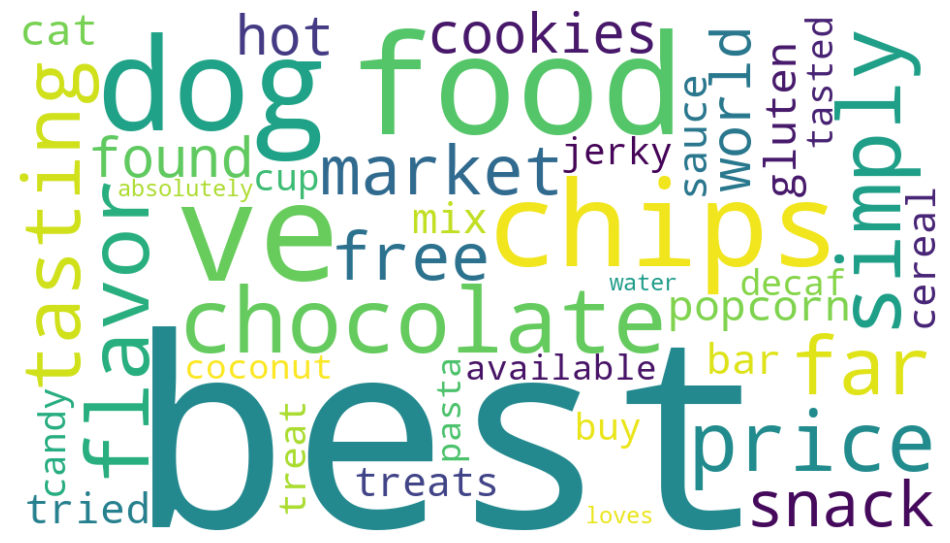

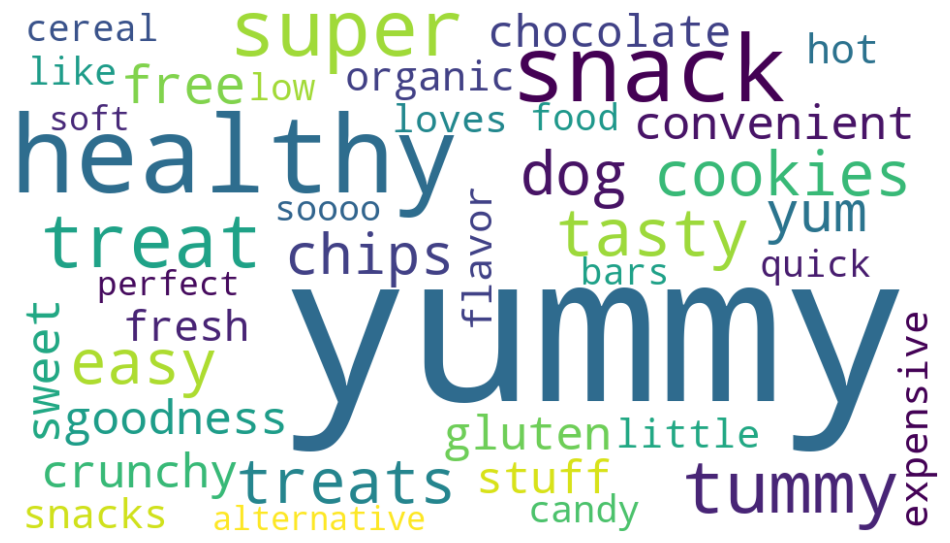

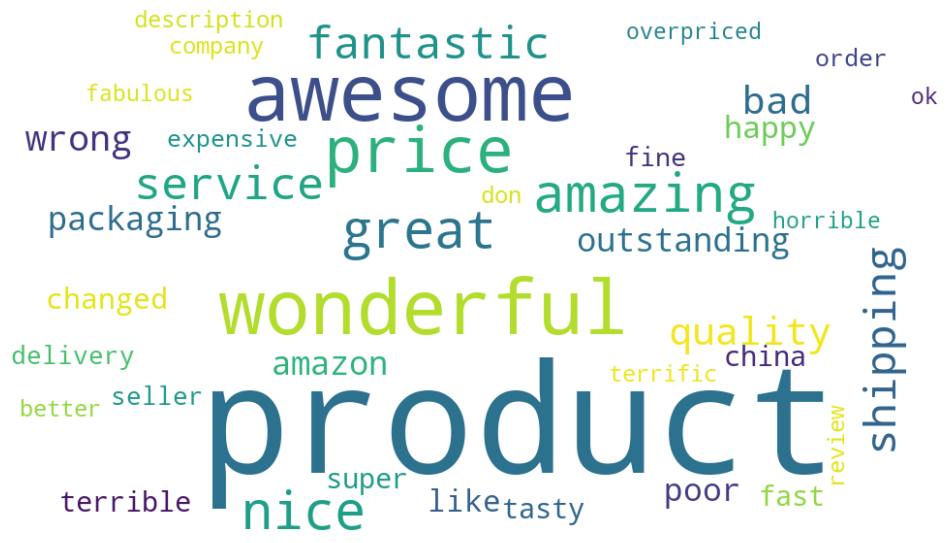

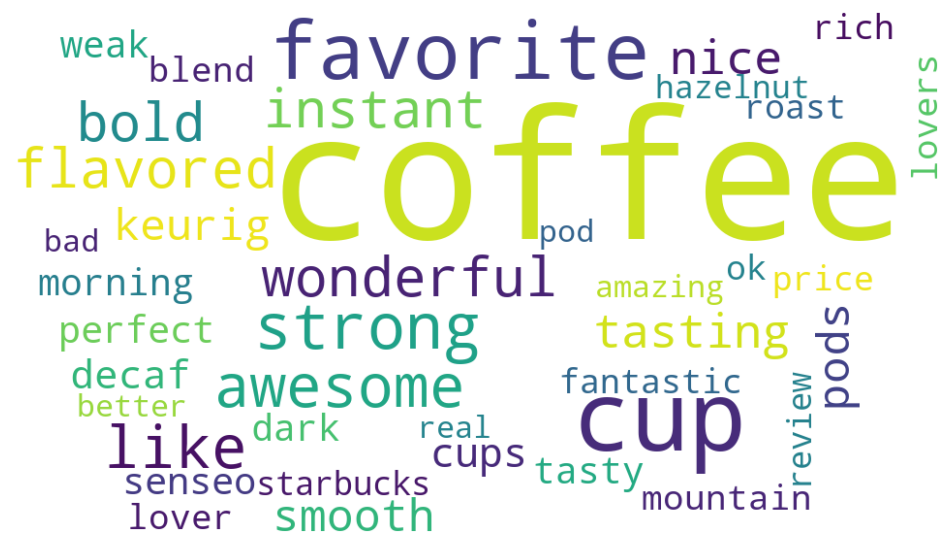

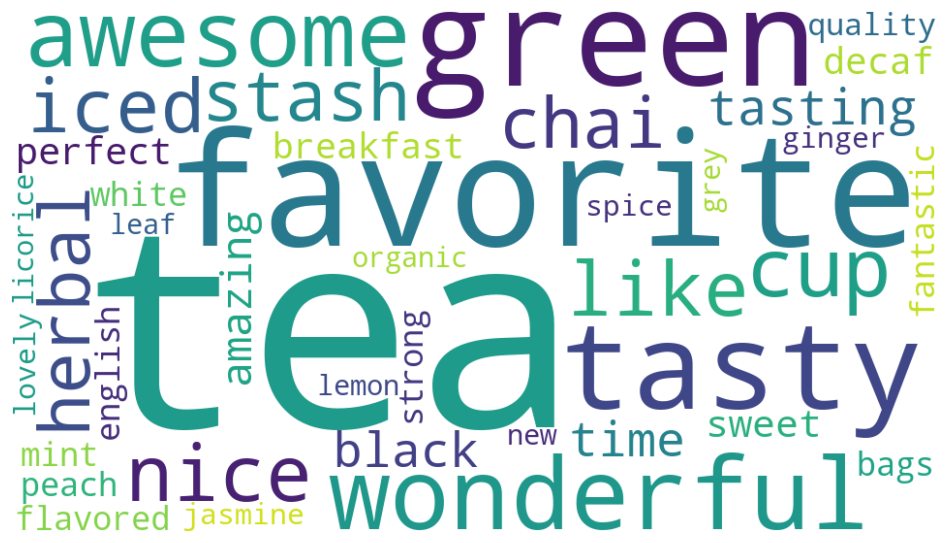

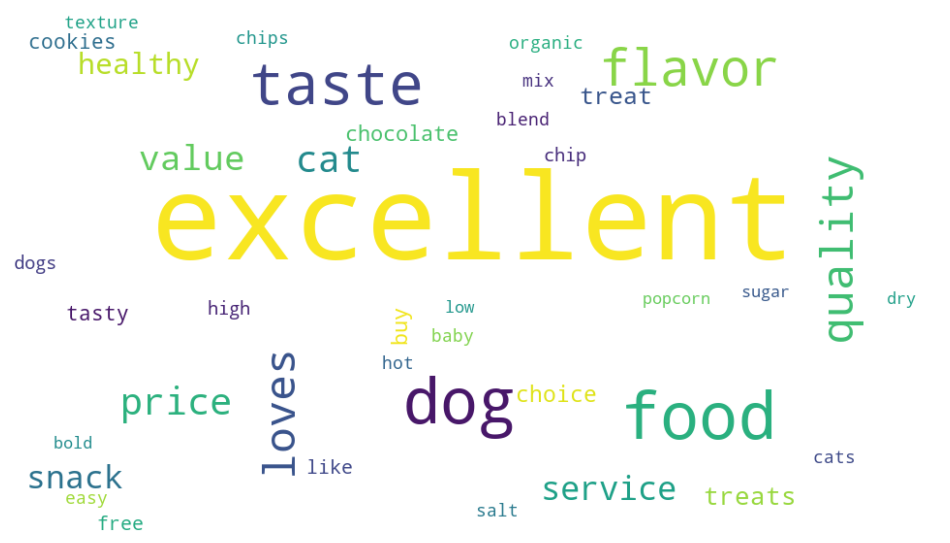

In [20]:
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

# WORDCLOUD FOR LDA

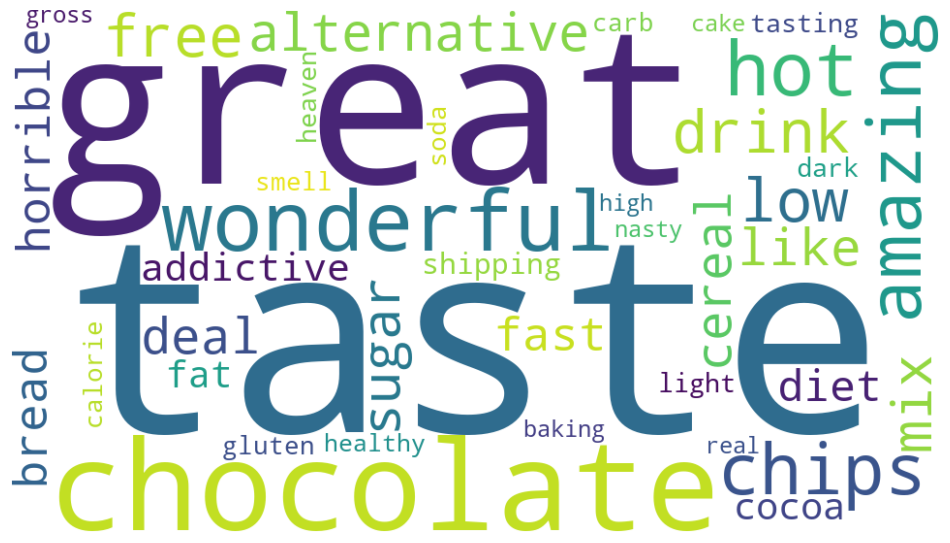

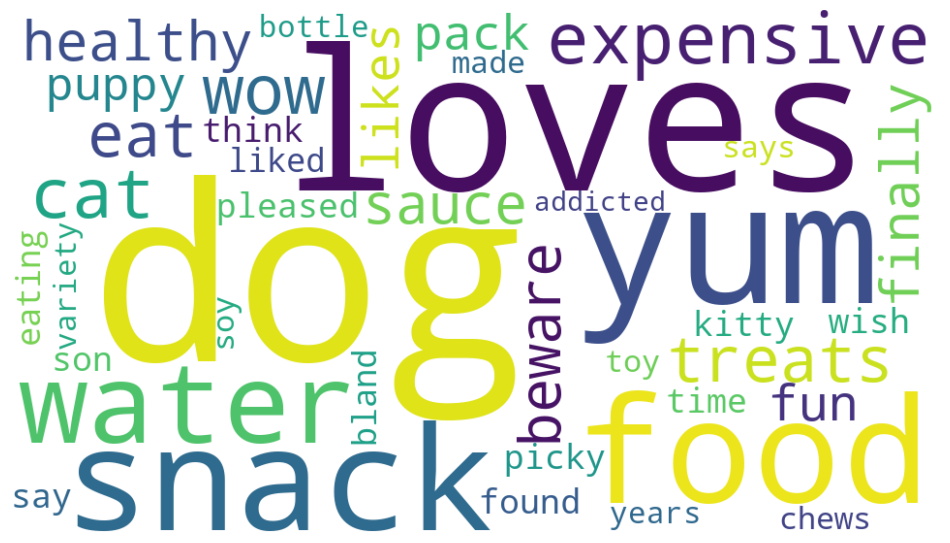

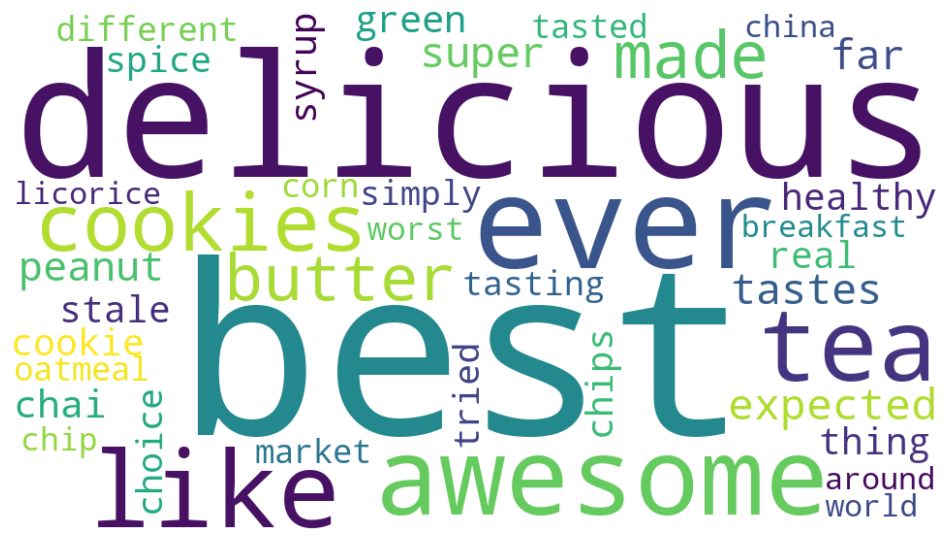

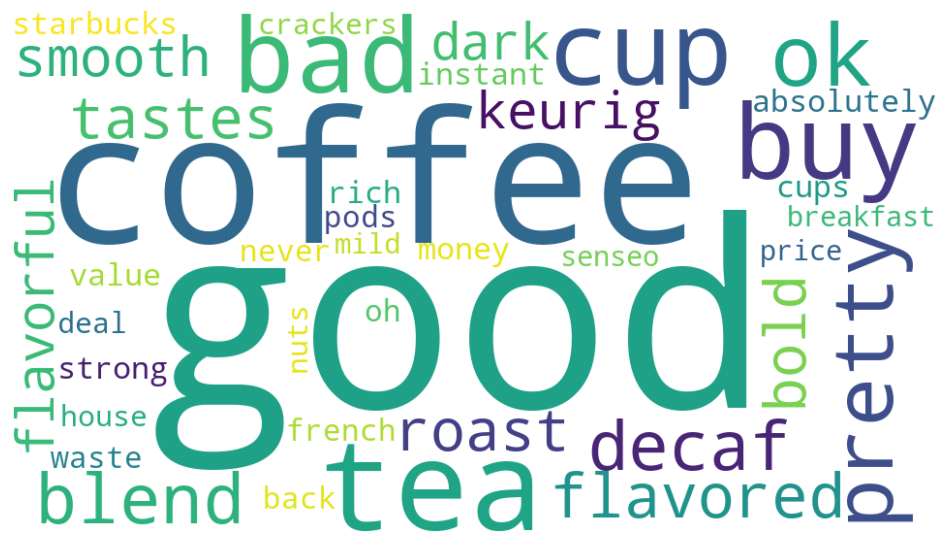

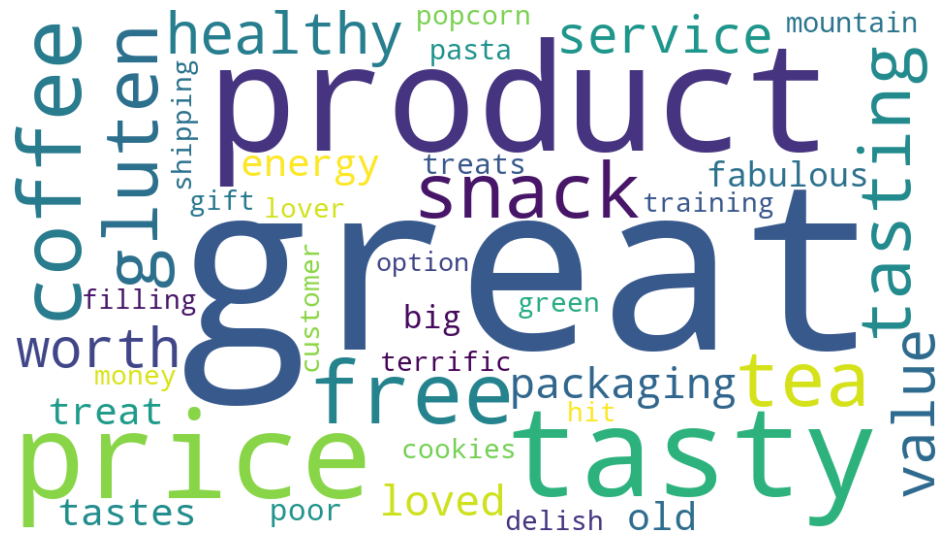

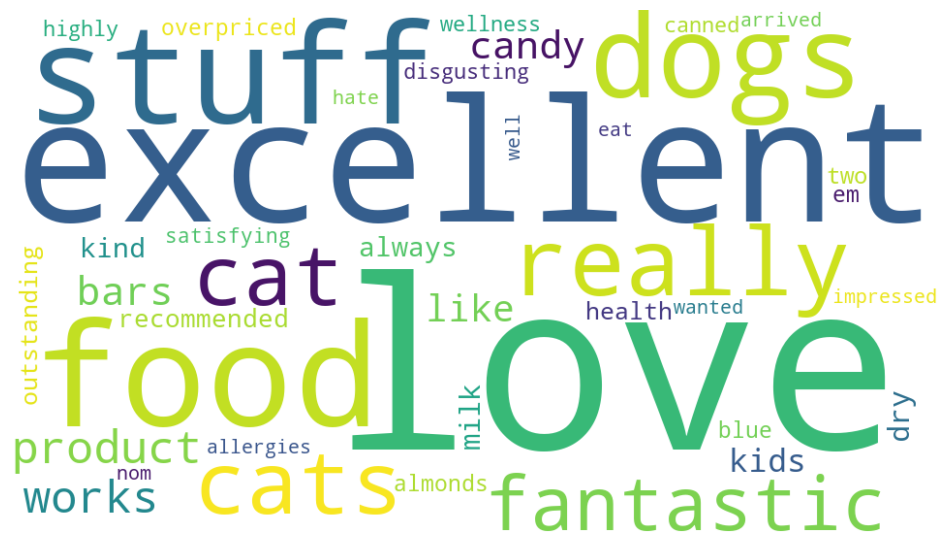

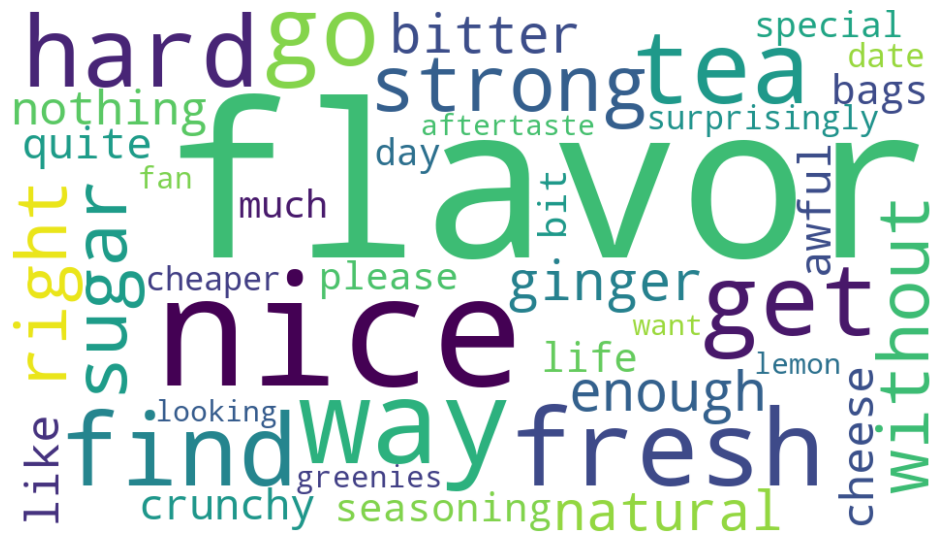

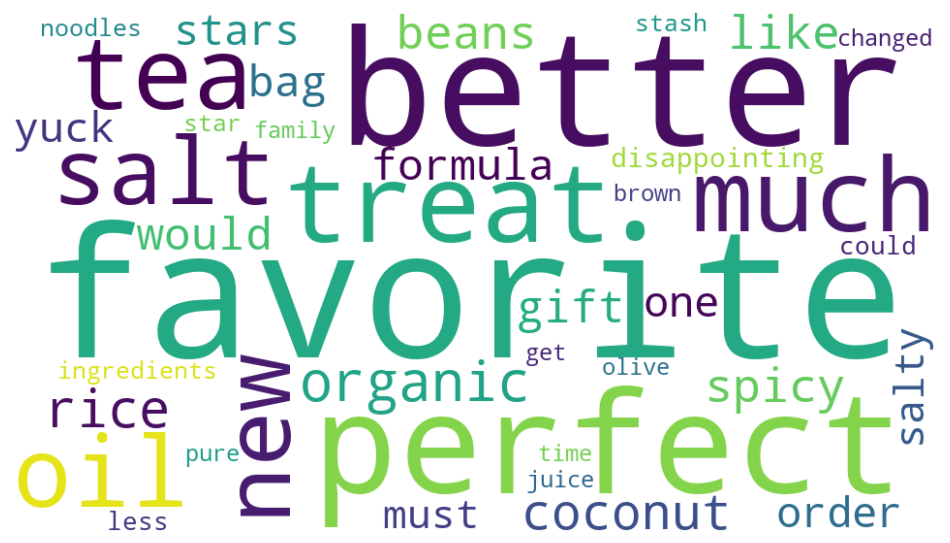

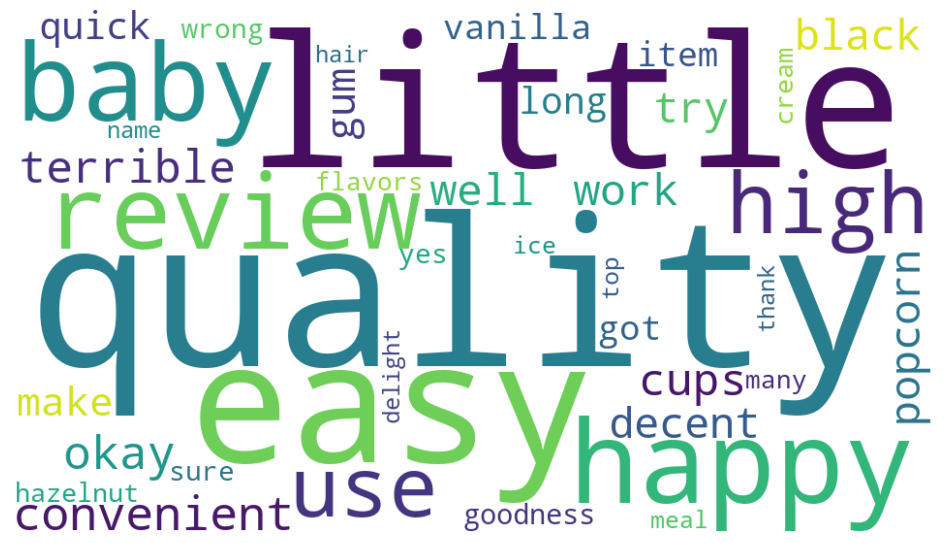

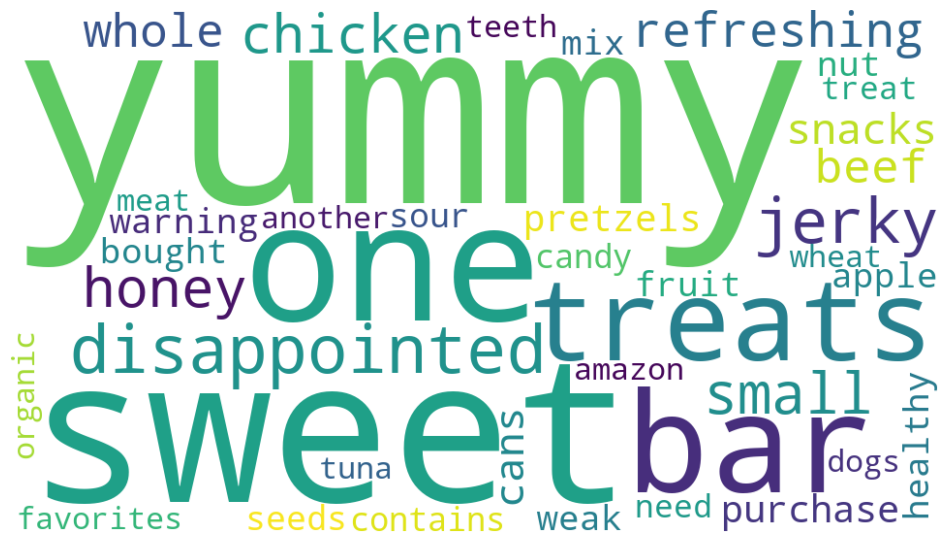

In [21]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

# Nomenclature for NMF Model Topics & Generating Topic Names 

In [22]:
#iterates over each topic in the model's components and identifies the most important words.

topic_names = []
voc = tfidf_para_vectorizer.vocabulary_
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = [word for word, index in voc.items() if index == important[-1]][0] + " " + [word for word, index in voc.items() if index == important[-2]][0]
    topic_names.append("Topic " + top_word)

In [25]:
from tqdm.auto import tqdm
import numpy as np
year_data = []
for year in tqdm(np.unique(np.unique(paragraph_df["HelpfulnessNumerator"]))):
    W_year = nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["HelpfulnessNumerator"] == year)])
    year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))

  0%|          | 0/231 [00:00<?, ?it/s]

/var/folders/kp/b62l9qwn3hg95vzxz9q38x440000gn/T/ipykernel_1744/2359149958.py:6: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/kp/b62l9qwn3hg95vzxz9q38x440000gn/T/ipykernel_1744/2359149958.py:6: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))


# VISUALIZE TOPIC DISTRIBUTION OVER YEARS

Text(0, 0.5, 'Topic Distribution')

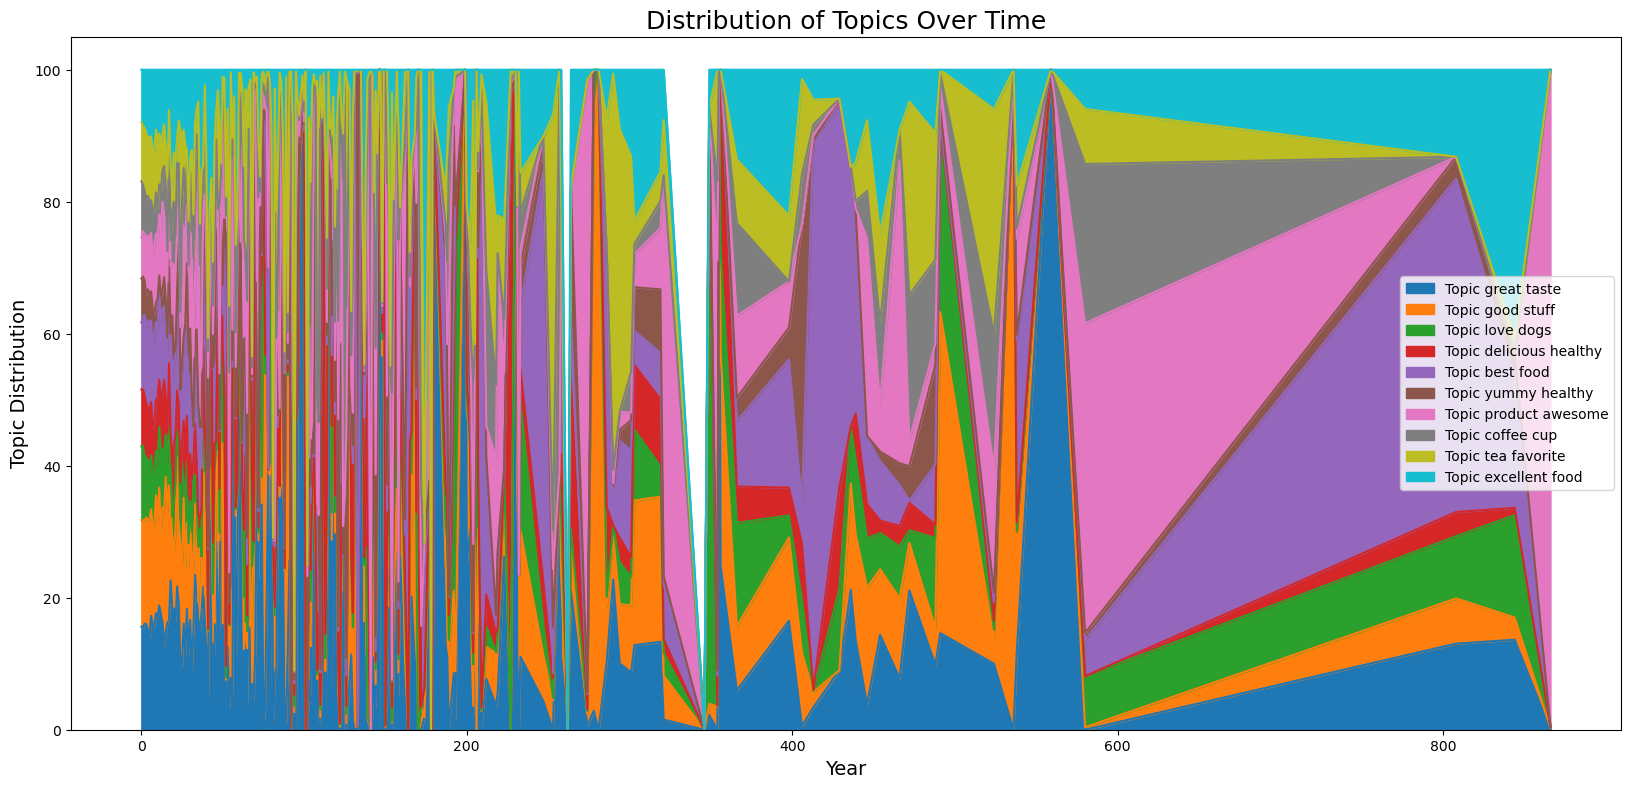

In [30]:
#imports matplotlib.pyplot as plt and uses it to visualize the distribution
import matplotlib.pyplot as plt
df_year = pd.DataFrame(year_data, columns=["label"] + topic_names).set_index("label")
df_year.plot.area(figsize=(20,9))
# Add title and labels with increased font size
plt.title('Distribution of Topics Over Time', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Topic Distribution', fontsize=14)